# Assignment 3

## Missing Values

Check for missing values.  If there are any missing values, deal with them appropriately.
Provide written justification explaining why you selected particular methods for dealing with missing values


In [1]:
import pandas as pd
import numpy as np

In [2]:
ld = pd.read_csv("loan_data.csv")
#ld.head()
#ld.tail()

In [3]:
ld.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing data inputs in: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History.

In [4]:
ld.groupby(["Gender"]).agg({'Gender':'count'})

,Gender
Gender,
Female,112
Male,489


This data seems to be stemming from an internal system documenting loan applicants' status and information.  This would suggest that any missing data is not reflective of a deliberate issue, or missing at random. 

Since Gender is a non-numeric, discrete variable and it has a high preference towards men in this dataset, it is appropriate to fill in the missing values with male and feel relativley safe on that assumption.

In [5]:
mod_ld = ld
mod_ld["Gender"].fillna("Male", inplace=True)
mod_ld.groupby(["Gender"]).agg({'Gender':'count'})

,Gender
Gender,
Female,112
Male,502


The number of missing data entries related to marital status is quite low, 3, and therefore it is most appropriate to delete these entries to eliminate the missing variables.

In [6]:
mod_ld['Married'].dropna()

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 611, dtype: object

<AxesSubplot:>

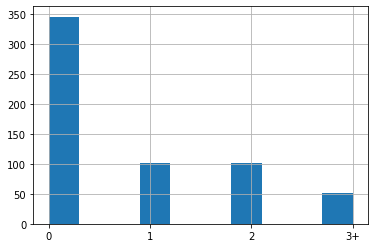

In [7]:
ld['Dependents'].hist()

Dependents data is not normally distributed, nor is it predictable in order to impute missing values.  Since the number of missing values remains low, we shall drop these rows from our dataset.

In [8]:
mod_ld['Dependents'].dropna()

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 599, dtype: object

In [9]:
ld.groupby(["Self_Employed"]).agg({'Self_Employed':'count'})

,Self_Employed
Self_Employed,
No,500
Yes,82


Since employment status is a non-numeric, discrete variable and it has a high preference towards No in this dataset, it is appropriate to fill in the missing values with no and feel relativley safe on that assumption.

In [10]:
mod_ld["Self_Employed"].fillna("No", inplace=True)
mod_ld.groupby(["Self_Employed"]).agg({'Self_Employed':'count'})

,Self_Employed
Self_Employed,
No,532
Yes,82


LoanAmount, Credit_History, and Loan_Amount_Term are both very important to what we are trying to assess, so the data that is missing shall be cut from the dataframe.

## Outliers

Check for outliers.  Do we keep them or do we drop them?  Why? 
Provide written justification explaining why you decided to keep or drop outliers.

## Discretizing

Discretize the following columns and explain why you chose particular discrete categories/ranges for the values
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term


## Determine Predictors

Think about which features make sense as predictors.  DO NOT use all features as predictors in your model.  
Provide a written justification explaining why you selected certain features and excluded others


For categorical columns (after you’ve dealt with missing values and after you have reduced the number of categories) make sure to LabelEncode your values


## Train Model

Train and evaluate three classification models, using any combination of Naive Bayes, SVM, KNN, LogisticRegression, DecisionTree, or RandomForest algorithms.  Your models must predict the Loan_Status.
Justify why you selected a particular algorithm based on your review of the data and based on the strengths and weaknesses of each of the algorithms discussed in the class and presented in the slides


## Evaluate

Report each model’s accuracy score
Report each model’s AUC score
Compare accuracy for the three models and make a recommendation as to which model performed best


Experiment with counterfactuals - try to change inputs into your best model and see how it affect predictions.  Describe what factors seem to influence loan approvals the most based on your counterfactuals observations.
Write a paragraph (as markdown) explaining whether or not your best  model is “good” and why
